In [ ]:
import re
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import multiprocessing
import numpy as np
from bs4 import BeautifulSoup
import csv
import tensorflow as tf
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from gensim.models import Word2Vec
import spacy 
import os
import io
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from scipy.stats.stats import pearsonr, spearmanr
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

In [ ]:
!pip install nlpaug 

In [ ]:
!pip install textaugment 

In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
from textaugment import Wordnet
from nlpaug.util import Action
import re
import pickle
from textaugment import EDA

In [ ]:
import nltk
nltk.download('all')

In [ ]:
t = Wordnet()
t1 = EDA()

In [ ]:
data_wiki = pd.read_csv('./wiki_movie_plots_deduped.csv')
wiki = list(data_wiki['Plot'].values)

In [ ]:
with open("conversations.out", encoding="utf8") as a_file:
    i=0
    twttr_data = []
    for line in a_file:
      l = " ".join(line.split())
      l = l.split()
      try:
        l.pop(0)
        l.pop(-1)
        l.pop(-1)
        l.pop(-1)
        l = ' '.join(l)
        twttr_data.append(l)
      except:
        pass

In [ ]:
eng_data = wiki + twttr_data

In [ ]:
len(eng_data)

4972177

In [ ]:
data = pd.read_csv('./zeros_v4.csv')
data1 = list(data['5'])

In [ ]:
len(data1)

28249

In [ ]:
with open("all.txt", encoding="utf8") as a_file:
    final_list_code = []
    new_list = []
    all_target_pos = []
    target_pos = []
    i = 0
    for line in a_file:
        l = " ".join(line.split())
        l = l.split()
        if len(l)==0:
            final_list_code.append(' '.join(new_list))
            new_list = []
        if len(l)!=0:
            new_list.append(l[0])
            # target_pos.append(l[2])

with open("Hinglish_train_14k_split_conll.txt", encoding="utf8") as a_file:
    final_list = []
    new_list = []
    target = []
    i = 0
    for line in a_file:
        l = " ".join(line.split())
        l = l.split()
        if len(l)!=0 and l[0]=='meta':
          target.append(l[2])
          # target.append(l[3])
        if len(l)==0:
            final_list.append(' '.join(new_list))
            new_list = []
        if len(l)!=0:
            new_list.append(l[0])

hinglish_data = data1 + final_list_code + final_list
print(len(hinglish_data))

44880


In [ ]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'of', \
            'at', 'by', 'for', 'with', 'about', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])


In [ ]:
# Combining all the above stundents 
def preprocess(raw):
  preprocessed = []
  # tqdm is for printing the status bar
  for sentance in tqdm(raw):
      try:
        shortword = re.compile(r'\W*\b\w{1,2}\b')    
        sentance = re.sub(r"http\S+", "", sentance)  #removing html tags
        sentance = re.sub('meta', '', sentance)
        sentance = shortword.sub('', sentance) 
        # sentance = BeautifulSoup(sentance, 'lxml').get_text() #xml tags
        sentance = decontracted(sentance)
        sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
        sentance = ' '.join(word for word in sentance.split() if word[0]!='@')
        sentance = re.sub('[^A-Za-z0-9]+', ' ', sentance)
        preprocessed.append(sentance.strip())
      except:
        pass
  return preprocessed 

In [ ]:
def augment(data):
  augmt = []
  for i in data:
    try:
      a1 = t1.random_swap(i)
      aug = naw.SynonymAug(aug_src='wordnet')
      a2 = aug.augment(i)
      augmt.append(a1)
      augmt.append(a2)
    except:
      pass
  data = data + augmt  
  return data

In [ ]:
def return_Tokens(data, aug):
  if aug==1:
    data = preprocess(data)
    data = augment(data)
  else:
    preprocess(data)
  final_data = []
  for i in data:
    final_data.append(i.split())
  return final_data

In [ ]:
hinglish_data = return_Tokens(hinglish_data, aug=1)
eng_data = return_Tokens(eng_data, aug=0)

100%|██████████| 4972177/4972177 [03:00<00:00, 27571.31it/s]


In [ ]:
w2v_params = {
    'alpha': 0.025,
    'size': 300,
    'window': 15,
    'iter': 1000,
    'min_count': 5,
    'sample': t,
    'sg': 1,
    'hs': 0,
    'negative': 5
}

wr_params = {
    'size': 300,
    'window': 15,
    'iter': 1000,
    'min_count': 5
}

In [ ]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 3854, done.
remote: Total 3854 (delta 0), reused 0 (delta 0), pack-reused 3854
Receiving objects: 100% (3854/3854), 8.22 MiB | 9.22 MiB/s, done.
Resolving deltas: 100% (2417/2417), done.
Checking out files: 100% (526/526), done.


In [ ]:
cd fastText

/content/drive/My Drive/Sentimix/fastText


In [ ]:
!make 

c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/args.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/autotune.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/matrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/dictionary.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/loss.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/productquantizer.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/densematrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/quantmatrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/vector.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/model.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/utils.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -

In [ ]:
cd ..

/content/drive/My Drive/Sentimix


In [ ]:
# output_file = '{:s}_ft'.format(output_name)
lr = 0.05
dim = 300
ws = 5
epoch = 1000
minCount = 5
neg = 5
loss = 'ns'
t = 1e-4
if not os.path.isfile(os.path.join(MODELS_DIR, '{:s}.vec'.format('ft_h_aug'))):
    print('Training fasttext....')
    %time !./fasttext skipgram -input {hinglish_data} -output {MODELS_DIR+'ft_h_aug'}  -lr {lr} -dim {dim} -ws {ws} -epoch {epoch} -minCount {minCount} -neg {neg} -loss {loss} -t {t}
else:
    print('\nUsing existing model file {:s}.vec'.format('ft_h_aug'))

In [ ]:


MODELS_DIR = 'models/'
!mkdir -p {MODELS_DIR}

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
glove_file = datapath('glove.6B.300d.txt')

# from gensim.models.wrappers import Wordrank
from gensim.models.word2vec import Text8Corpus


w2v_params = {
    'size': 300,
    'min_count': 2
}

wr_params = {
    'size': 300,
    'min_count': 2
}

def train_models(corpus_file, output_name):
    # Train using word2vec
    # output_file = '{:s}_gs'.format(output_name)
    # if not os.path.isfile(os.path.join(MODELS_DIR, '{:s}.vec'.format(output_file))):
    #     # print('\nTraining word2vec on {:s} corpus..'.format(corpus_file))
    #     # Text8Corpus class for reading space-separated words file
    #     gs_model = Word2Vec(corpus_file, **w2v_params); gs_model
    #     gs_model.train(corpus_file, total_examples=gs_model.corpus_count, epochs=1000)
    #     locals()['gs_model'].wv.save_word2vec_format(os.path.join(MODELS_DIR, '{:s}.vec'.format(output_file)))
    #     print('\nSaved gensim model as {:s}.vec'.format(output_file))
    # else:
    #     print('\nUsing existing model file {:s}.vec'.format(output_file))

    output_file = '{:s}_gn'.format(output_name)
    if not os.path.isfile(os.path.join(MODELS_DIR, '{:s}.vec'.format(output_file))):
        # print('\nTraining word2vec on {:s} corpus..'.format(corpus_file))
        # Text8Corpus class for reading space-separated words file
        gn_model = Word2Vec(corpus_file, **w2v_params); gn_model
        gn_model.intersect_word2vec_format('GoogleNews-vectors-negative300.bin', lockf=1.0, binary=True)
        # gn_model.train(corpus_file, total_examples=gn_model.corpus_count, epochs=5)
        locals()['gn_model'].wv.save_word2vec_format(os.path.join(MODELS_DIR, '{:s}.vec'.format(output_file)))
        print('\nSaved google-News model as {:s}.vec'.format(output_file))
    else:
        print('\nUsing existing model file {:s}.vec'.format(output_file))


    output_file = '{:s}_gv'.format(output_name)
    if not os.path.isfile(os.path.join(MODELS_DIR, '{:s}.vec'.format(output_file))):
        tmp_file = get_tmpfile("gensim.txt")
        _ = glove2word2vec('glove.6B.300d.txt', tmp_file)
        gv_model = Word2Vec(corpus_file, **w2v_params); gv_model
        gv_model.intersect_word2vec_format(tmp_file, lockf=1.0)
        # gv_model.train(corpus_file, total_examples=gv_model.corpus_count, epochs=5)
        locals()['gv_model'].wv.save_word2vec_format(os.path.join(MODELS_DIR, '{:s}.vec'.format(output_file)))
        print('\nSaved Glove model as {:s}.vec'.format(output_file))
    else:
        print('\nUsing existing model file {:s}.vec'.format(output_file))

In [ ]:
train_models(hinglish_data, output_name='hinglish-aug')


Saved gensim model as hinglish-aug_gs.vec

Saved google-News model as hinglish-aug_gn.vec

Saved Glove model as hinglish-aug_gv.vec


In [ ]:
train_models(eng_data, output_name='english')


Saved gensim model as english_gs.vec

Saved google-News model as english_gn.vec

Saved Glove model as english_gv.vec


In [ ]:
word_eng = './eng_analogies.txt'
simlex_eng = './simlex999.txt'
wordsim_eng = './wordsim353.tsv'

word_heng = './modified-analogies.txt'
simlex_heng = './simlex999-edited - Sheet1.tsv'
wordsim_heng = './wsm-edited - Sheet1.tsv'

In [ ]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = np.array(tokens[1:]).reshape(1,-1)
    return data

In [ ]:
model_h_ft = load_vectors('modelft.vec')

In [ ]:
ft = KeyedVectors.load_word2vec_format('modelft.vec')

In [ ]:


import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

def print_analogy_accuracy(model, questions_file):
    acc = model.wv.accuracy(questions_file)

    sem_correct = sum((len(acc[i]['correct']) for i in range(5)))
    sem_total = sum((len(acc[i]['correct']) + len(acc[i]['incorrect'])) for i in range(5))
    sem_acc = 100*float(sem_correct)/sem_total
    print('\nSemantic: {:d}/{:d}, Accuracy: {:.2f}%'.format(sem_correct, sem_total, sem_acc))
    
    syn_correct = sum((len(acc[i]['correct']) for i in range(5, len(acc)-1)))
    syn_total = sum((len(acc[i]['correct']) + len(acc[i]['incorrect'])) for i in range(5,len(acc)-1))
    syn_acc = 100*float(syn_correct)/syn_total
    print('Syntactic: {:d}/{:d}, Accuracy: {:.2f}%\n'.format(syn_correct, syn_total, syn_acc))
    
def print_similarity_accuracy(model, similarity_file):
    acc = model.wv.evaluate_word_pairs(similarity_file)
    print('Pearson correlation coefficient: {:.2f}'.format(acc[0][0]))
    print('Spearman rank correlation coefficient: {:.2f}'.format(acc[1][0]))



In [ ]:
print('SimLex-999 similarity')
print_similarity_accuracy(ft, simlex_heng)
print('\nWordSim-353 similarity')
print_similarity_accuracy(ft, wordsim_heng)

In [ ]:
# model_words = set(model_h_ft.vocab)
cosine_sim, cosine_dist, pearson, spearman, human = [], [], [], [], []
with open(simlex_heng,'r') as t:
  for line in csv.reader(t, delimiter='\t'):
    # if line[0] is '#':
    #   continue
    if (line[0] in model_h_ft) and (line[1] in model_h_ft):
      cosine_sim.append(cosine_similarity(model_h_ft[line[0]].reshape(1,-1), model_h_ft[line[1]].reshape(1,-1))[0][0])
      c = cosine_similarity(model_h_ft[line[0]].reshape(1,-1), model_h_ft[line[1]].reshape(1,-1))[0][0]
      human.append(float(line[2]))
    else:
      # print(line[0][0])
      if line[0][0] is '#':
        continue
      # print(line[0])
      human.append(float(line[2]))
      cosine_sim.append(0)


print('cosine sim', np.sum(np.array(cosine_sim))/len(cosine_sim))
print('pearson corr', pearsonr(human, cosine_sim))
print('spearman corr', spearmanr(human, cosine_sim))

In [ ]:
model_heng = load_vectors('newvecs.vec')

In [ ]:
model_eng = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec')

In [ ]:
# with open('newvecs.vec') as f:
#     lines = f.readlines()
#     model_h = dict()
#     vocab_h = set()
#     for l in lines:
#       l = l.split()
#       vocab_h.add(l[0])
#       if l[0] in vocab_h:
#         model_h[l[0]] = np.array(l[1:])
        # print

In [ ]:
model_h_gs = KeyedVectors.load_word2vec_format(MODELS_DIR + 'hinglish_gs.vec')
model_h_gn = KeyedVectors.load_word2vec_format(MODELS_DIR + 'hinglish_gn.vec')
model_h_gv = KeyedVectors.load_word2vec_format(MODELS_DIR + 'hinglish_gv.vec')

In [ ]:
model_h_gs_aug = KeyedVectors.load_word2vec_format(MODELS_DIR + 'hinglish-aug_gs.vec')
model_h_gn_aug = KeyedVectors.load_word2vec_format(MODELS_DIR + 'hinglish-aug_gn.vec')
model_h_gv_aug = KeyedVectors.load_word2vec_format(MODELS_DIR + 'hinglish-aug_gv.vec')

In [ ]:
model_e_gs = KeyedVectors.load_word2vec_format(MODELS_DIR + 'english_gs.vec')
model_e_gn = KeyedVectors.load_word2vec_format(MODELS_DIR + 'english_gn.vec')
model_e_gv = KeyedVectors.load_word2vec_format(MODELS_DIR + 'english_gv.vec')

In [ ]:
def getMeasure_cosine(model, wordanalogy):
  model_words = set(model.vocab)
  cosine_sim = []
  with open(wordanalogy,'r') as f:
    for line in f:
      line = line.split()
      if (line[0] in model_words) and (line[1] in model_words):
        cosine_sim.append(cosine_similarity(model[line[0]].reshape(1,-1), model[line[1]].reshape(1,-1))[0][0])
      else:
        cosine_sim.append(0)
  print('cosine sim', np.sum(np.array(cosine_sim))/len(cosine_sim))


In [ ]:
def getMeasures(model, file, t):
  model_words = set(model.vocab)
  cosine_sim, cosine_dist, pearson, spearman, human = [], [], [], [], []
  if t==1:
    with open(file,'r') as t:
      for line in csv.reader(t, delimiter='\t'):
        # if line[0] is '#':
        #   continue
        if (line[0] in model_words) and (line[1] in model_words):
          cosine_sim.append(cosine_similarity(model[line[0]].reshape(1,-1), model[line[1]].reshape(1,-1))[0][0])
          c = cosine_similarity(model[line[0]].reshape(1,-1), model[line[1]].reshape(1,-1))[0][0]
          human.append(float(line[2]))
        else:
          # print(line[0][0])
          if line[0][0] is '#':
            continue
          # print(line[0])
          human.append(float(line[2]))
          cosine_sim.append(0)


    print('cosine sim', np.sum(np.array(cosine_sim))/len(cosine_sim))
    print('pearson corr', pearsonr(human, cosine_sim))
    print('spearman corr', spearmanr(human, cosine_sim))

  else:
    with open(file,'r') as f:
      for line in f:
        line = line.split()
        if line[0] is '#':
          continue
        elif (line[0] in model_words) and (line[1] in model_words):
          cosine_sim.append(cosine_similarity(model[line[0]].reshape(1,-1), model[line[1]].reshape(1,-1))[0][0])
          c = cosine_similarity(model[line[0]].reshape(1,-1), model[line[1]].reshape(1,-1))[0][0]
          human.append(float(line[2]))
        else:
          # print(line[2])
          human.append(float(line[2]))
          cosine_sim.append(0)
  
    print('cosine sim', np.sum(np.array(cosine_sim))/len(cosine_sim))
    print('pearson corr', pearsonr(human, cosine_sim))
    print('spearman corr', spearmanr(human, cosine_sim))


In [ ]:
print('*****'*2 ,'Word Analogy' ,'*****'*5)
getMeasure_cosine(model_h_gs, word_heng)
print('--'*20)
getMeasure_cosine(model_h_gs_aug, word_heng)
print('\n')
print('*****'*2 ,'Simlex' ,'*****'*5)
getMeasures(model_h_gs, simlex_heng, t=1)
print('--'*20)
getMeasures(model_h_gs_aug, simlex_heng, t=1)
print('\n')
print('*****'*2 ,'Wordsim' ,'*****'*5)
getMeasures(model_h_gs, wordsim_heng, t=1)
print('--'*20)
getMeasures(model_h_gs_aug, wordsim_heng, t=1)

********** Word Analogy *************************
cosine sim 0.05955080842246202
----------------------------------------
cosine sim 0.06547663614622583


********** Simlex *************************
cosine sim 0.034910053500791405
pearson corr (0.10186086381635936, 5.0644779796386165e-06)
spearman corr SpearmanrResult(correlation=-0.0057747714213506555, pvalue=0.7964323118071639)
----------------------------------------
cosine sim 0.04420633596799069
pearson corr (0.16703644583098115, 5.711145024479149e-14)
spearman corr SpearmanrResult(correlation=0.07304107725087731, pvalue=0.0010862304131650335)


********** Wordsim *************************
cosine sim 0.013328110647367025
pearson corr (0.0745755920264187, 0.04761703385539644)
spearman corr SpearmanrResult(correlation=0.04895135370881848, pvalue=0.19389453693141218)
----------------------------------------
cosine sim 0.02048693973407487
pearson corr (0.14973813831134591, 6.493205906931576e-05)
spearman corr SpearmanrResult(correlati

In [ ]:
# getMeasure_cosine(model_h_gn, word_heng)
# print('*****'*10)
# getMeasures(model_h_gn, simlex_heng, t=1)
# print('*****'*10)
# getMeasures(model_h_gn, wordsim_heng, t=1)

print('*****'*2 ,'Word Analogy' ,'*****'*5)
getMeasure_cosine(model_h_gn, word_heng)
print('--'*20)
getMeasure_cosine(model_h_gn_aug, word_heng)
print('\n')
print('*****'*2 ,'Simlex' ,'*****'*5)
getMeasures(model_h_gn, simlex_heng, t=1)
print('--'*20)
getMeasures(model_h_gn_aug, simlex_heng, t=1)
print('\n')
print('*****'*2 ,'Wordsim' ,'*****'*5)
getMeasures(model_h_gn, wordsim_heng, t=1)
print('--'*20)
getMeasures(model_h_gn_aug, wordsim_heng, t=1)

********** Word Analogy *************************
cosine sim 0.20046154369505884
----------------------------------------
cosine sim 0.2124313171438961


********** Simlex *************************
cosine sim 0.19794645944101694
pearson corr (0.03983972145657303, 0.07501251276549514)
spearman corr SpearmanrResult(correlation=-0.009212488741669713, pvalue=0.680676613487591)
----------------------------------------
cosine sim 0.22264605093219722
pearson corr (0.10745038011447028, 1.4804217448539614e-06)
spearman corr SpearmanrResult(correlation=0.06615508102008318, pvalue=0.0030918421009520007)


********** Wordsim *************************
cosine sim 0.13564072168173621
pearson corr (0.14497995692486387, 0.00011071217806583068)
spearman corr SpearmanrResult(correlation=0.0821479742510591, pvalue=0.029069111963053614)
----------------------------------------
cosine sim 0.14357196801970648
pearson corr (0.17998934533358982, 1.484401508145219e-06)
spearman corr SpearmanrResult(correlation=

In [ ]:
print('*****'*2 ,'Word Analogy' ,'*****'*5)
getMeasure_cosine(model_h_gv, word_heng)
print('--'*20)
getMeasure_cosine(model_h_gv_aug, word_heng)
print('\n')
print('*****'*2 ,'Simlex' ,'*****'*5)
getMeasures(model_h_gv, simlex_heng, t=1)
print('--'*20)
getMeasures(model_h_gv_aug, simlex_heng, t=1)
print('\n')
print('*****'*2 ,'Wordsim' ,'*****'*5)
getMeasures(model_h_gv, wordsim_heng, t=1)
print('--'*20)
getMeasures(model_h_gv_aug, wordsim_heng, t=1)

********** Word Analogy *************************
cosine sim 0.18442298536621518
----------------------------------------
cosine sim 0.20696061419729392


********** Simlex *************************
cosine sim 0.1686953121132718
pearson corr (0.06048961557534801, 0.006838469883962316)
spearman corr SpearmanrResult(correlation=-0.0017078754783528272, pvalue=0.9391863162518991)
----------------------------------------
cosine sim 0.20138402826413657
pearson corr (0.1294375514794301, 6.377350308330223e-09)
spearman corr SpearmanrResult(correlation=0.0712543870587739, pvalue=0.001437281110041968)


********** Wordsim *************************
cosine sim 0.12376432238348987
pearson corr (0.16139429804025682, 1.639689137496553e-05)
spearman corr SpearmanrResult(correlation=0.09494759809346535, pvalue=0.01160099997978497)
----------------------------------------
cosine sim 0.14262758557112207
pearson corr (0.1978502460117739, 1.156910960324656e-07)
spearman corr SpearmanrResult(correlation=0.1

In [ ]:
getMeasure_cosine_aibharat(model_eng, word_heng)
print('*****'*10)
getMeasuresAibharat(model_eng, simlex_heng)
print('*****'*10)
getMeasuresAibharat(model_eng, wordsim_heng)
print('*****'*10)

cosine sim 0.5360707681937175
**************************************************
cosine sim 0.3099695747485608
pearson corr (0.19703811832792983, 6.156505183830005e-19)
spearman corr SpearmanrResult(correlation=0.15671837733509164, pvalue=1.86343937501036e-12)
**************************************************
cosine sim 0.24680813535510251
pearson corr (0.28531240782213546, 1.0863601509086187e-14)
spearman corr SpearmanrResult(correlation=0.260264008497877, pvalue=2.1476889456626768e-12)
**************************************************


In [ ]:
getMeasure_cosine(model_e_gs, word_eng)
print('*****'*10)
getMeasures(model_e_gs, simlex_eng, t=0)
print('*****'*10)
getMeasures(model_e_gs, wordsim_eng, t=0)

cosine sim 0.23366037545556373
**************************************************
cosine sim 0.2966567623605896
pearson corr (0.29717681539080204, 8.090061582933014e-22)
spearman corr SpearmanrResult(correlation=0.2970580923590343, pvalue=8.411513634462876e-22)
**************************************************
cosine sim 0.20219000928445585
pearson corr (0.5187195218027546, 1.049471740814211e-25)
spearman corr SpearmanrResult(correlation=0.5188920927198059, pvalue=1.0049745238704434e-25)


In [ ]:
getMeasure_cosine(model_e_gn, word_eng)
print('*****'*10)
getMeasures(model_e_gn, simlex_eng, t=0)
print('*****'*10)
getMeasures(model_e_gn, wordsim_eng, t=0)

cosine sim 0.2666130715540864
**************************************************
cosine sim 0.3283170998942254
pearson corr (0.38688376735986085, 5.123101099484366e-37)
spearman corr SpearmanrResult(correlation=0.376728252069656, pvalue=4.857469678486345e-35)
**************************************************
cosine sim 0.23891346843060035
pearson corr (0.510272865679181, 8.490431940314949e-25)
spearman corr SpearmanrResult(correlation=0.5191952136173823, pvalue=9.312778124348126e-26)


In [ ]:
getMeasure_cosine(model_e_gv, word_eng)
print('*****'*10)
getMeasures(model_e_gv, simlex_eng, t=0)
print('*****'*10)
getMeasures(model_e_gv, wordsim_eng, t=0)

cosine sim 0.27238130613145506
**************************************************
cosine sim 0.3359952575316908
pearson corr (0.38556206423198713, 9.349342700160802e-37)
spearman corr SpearmanrResult(correlation=0.3741928799807553, pvalue=1.4761227983531944e-34)
**************************************************
cosine sim 0.24589866572178415
pearson corr (0.5197587611168615, 8.081614315222169e-26)
spearman corr SpearmanrResult(correlation=0.5177253091748142, pvalue=1.3463639903617732e-25)


In [ ]:
getMeasure_cosine(model_eng, word_eng)
print('*****'*10)
getMeasures(model_eng, simlex_eng, t=0)
print('*****'*10)
getMeasures(model_eng, wordsim_eng, t=0)

cosine sim 0.7028243741122159
**************************************************
cosine sim 0.5582480674033409
pearson corr (0.46973363800244045, 5.726202817860239e-56)
spearman corr SpearmanrResult(correlation=0.4499649189464246, pvalue=5.873938609083687e-51)
**************************************************
cosine sim 0.48025659663819054
pearson corr (0.7029515397109581, 6.886447133918337e-54)
spearman corr SpearmanrResult(correlation=0.7332763287687719, pvalue=9.073227394420638e-61)


In [ ]:
def getMeasure_cosine_aibharat(model, wordanalogy):
  model_words = set(model.vocab)
  cosine_sim = []
  with open(wordanalogy,'r') as f:
    for line in f:
      line = line.split()
      if (line[0] in model_heng) and (line[1] in model_heng):
        cosine_sim.append(cosine_similarity(model_heng[line[0]], model_heng[line[1]])[0][0])
        continue
      elif (line[0] in model_words) and (line[1] in model_words):
        cosine_sim.append(cosine_similarity(model[line[0]].reshape(1,-1), model[line[1]].reshape(1,-1))[0][0])
      else:
        cosine_sim.append(0)
  print('cosine sim', np.sum(np.array(cosine_sim))/len(cosine_sim))


In [ ]:
def getMeasuresAibharat(model, file):
  model_words = set(model.vocab)
  cosine_sim, cosine_dist, pearson, spearman, human = [], [], [], [], []

  with open(file,'r') as f:
    for line in csv.reader(f, delimiter='\t'):
      # line = line.split()
      if line[0] is '#':
        continue
      elif (line[0] in model_heng) and (line[1] in model_heng):
        cosine_sim.append(cosine_similarity(model_heng[line[0]], model_heng[line[1]])[0][0])
        human.append(float(line[2]))
        continue
      elif (line[0] in model_words) and (line[1] in model_words):
        cosine_sim.append(cosine_similarity(model[line[0]].reshape(1,-1), model[line[1]].reshape(1,-1))[0][0])
        human.append(float(line[2]))
      else:
        human.append(float(line[2]))
        cosine_sim.append(0)
  print('cosine sim', np.sum(np.array(cosine_sim))/len(cosine_sim))
  print('pearson corr', pearsonr(human, cosine_sim))
  print('spearman corr', spearmanr(human, cosine_sim))  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df.head()

In [ ]:
data = {'Models':['H_gs', 'H_gs_aug', 'H_gn', 'H_gn_aug', 'H_gv', 'H_gv_aug', 'H_FT', 'E_gs', 'E_gn', 'E_gv', 'E_FT'],
        'Cosine_Similarity':[0.059, 0.064, 0.200, 0.212, 0.184, 0.206, 0.536, 0.233, 0.266, 0.272, 0.702]
       }
df = pd.DataFrame(data)

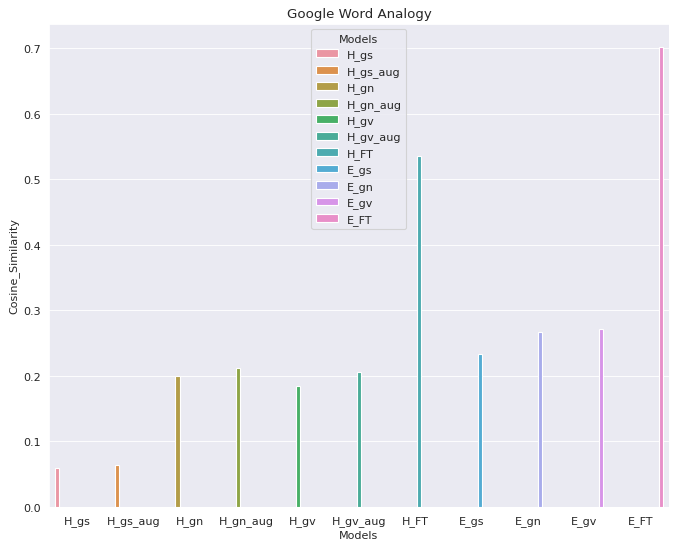

In [ ]:
plt.figure(figsize=(10, 8), dpi=80)
sns.barplot(x = 'Models',
            y = 'Cosine_Similarity',
            hue = 'Models',
            data = df)
plt.title('Google Word Analogy')
plt.show()

In [ ]:
data = {'Models':['H_gs', 'H_gs_aug', 'H_gn', 'H_gn_aug', 'H_gv', 'H_gv_aug', 'H_FT', 'E_gs', 'E_gn', 'E_gv', 'E_FT'],
        'Cosine_Similarity':[0.034, 0.044, 0.197, 0.222, 0.168, 0.201, 0.309, 0.296, 0.328, 0.335, 0.558],
        'Pearson_Correlation':[0.101, 0.167,0.039, 0.107, 0.060, 0.129, 0.197, 0.297, 0.386, 0.385, 0.496],
        'Spearman_Correlation':[0.005, 0.073, 0.009, 0.066, 0.001, 0.071, 0.156, 0.297, 0.376, 0.374, 0.449]}
df = pd.DataFrame(data)

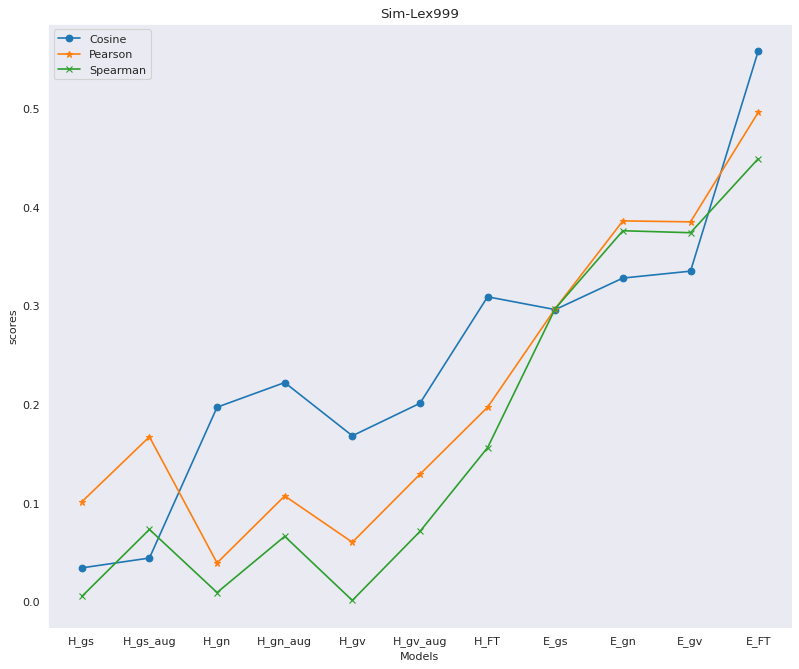

In [ ]:
plt.figure(figsize=(12, 10), dpi=80)
plt.plot(data['Models'], data['Cosine_Similarity'], marker = 'o', label='Cosine')
plt.plot(data['Models'], data['Pearson_Correlation'], marker = '*', label='Pearson')
plt.plot(data['Models'], data['Spearman_Correlation'], marker = 'x', label='Spearman')
plt.xlabel('Models')
plt.ylabel('scores')
plt.title('Sim-Lex999')
plt.grid()
plt.legend()
plt.show()

In [ ]:
data = {'Models':['H_gs', 'H_gs_aug', 'H_gn', 'H_gn_aug', 'H_gv', 'H_gv_aug', 'H_FT', 'E_gs', 'E_gn', 'E_gv', 'E_FT'],
        'Cosine_Similarity':[0.013, 0.020, 0.135, 0.143, 0.123, 0.142, 0.246, 0.202, 0.239, 0.246, 0.480],
        'Pearson_Correlation':[0.074, 0.149, 0.145, 0.179, 0.161, 0.197, 0.285, 0.518, 0.510, 0.519, 0.703],
        'Spearman_Correlation':[0.048, 0.117, 0.082, 0.121, 0.095, 0.117, 0.260, 0.519, 0.519, 0.518, 0.733]}
df = pd.DataFrame(data)

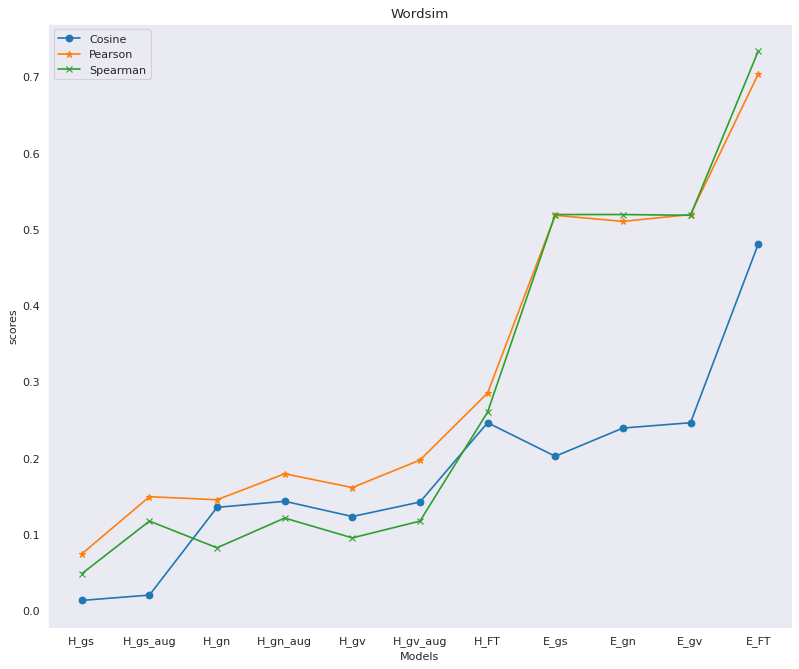

In [ ]:
plt.figure(figsize=(12, 10), dpi=80)
plt.plot(data['Models'], data['Cosine_Similarity'], marker = 'o', label='Cosine')
plt.plot(data['Models'], data['Pearson_Correlation'], marker = '*', label='Pearson')
plt.plot(data['Models'], data['Spearman_Correlation'], marker = 'x', label='Spearman')
plt.xlabel('Models')
plt.ylabel('scores')
plt.title('Wordsim')
plt.grid()
plt.legend()
plt.show()